All the code is taken from https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

In [12]:
from sklearn import tree, linear_model, gaussian_process, ensemble, naive_bayes, neighbors, svm, discriminant_analysis
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection 
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib as mpl

import seaborn as sns
from pandas.tools.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [13]:
import sys
import pandas as pd 
import numpy as np
import scipy as sp
import sklearn 
import matplotlib
import IPython

import time 
import random

import warnings
warnings.filterwarnings('ignore')

print('sys version: {}'.format(sys.version))
print('pandas version: {}'.format(pd.__version__))
print('numpy version: {}'.format(np.__version__))
print('scipy version: {}'.format(sp.__version__))
print('skelearn version: {}'.format(sklearn.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))
print('IPython version: {}'.format(IPython.__version__))

print('-'*25)

from subprocess import check_output
print(check_output(['ls', '/home/ginkobab/Documents/ML/Kaggle/titanic']).decode('utf-8'))

sys version: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
pandas version: 0.23.4
numpy version: 1.15.2
scipy version: 1.2.0
skelearn version: 0.20.2
matplotlib version: 3.0.2
IPython version: 7.2.0
-------------------------
gender_submission.csv
test.csv
train.csv



In [14]:
data_raw = pd.read_csv('/home/ginkobab/Documents/ML/Kaggle/titanic/train.csv')
data_val = pd.read_csv('/home/ginkobab/Documents/ML/Kaggle/titanic/train.csv')

data1 = data_raw.copy(deep = True)

data_cleaner = [data1, data_val]

data_raw.info()


data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S
727,728,1,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S


In [15]:
print('Train data null values:', data1.isnull().sum())
print(10*'-')
print('Test data null values:', data_val.isnull().sum())
print(10*'-')

data_raw.describe(include='all')

Train data null values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test data null values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Adahl, Mr. Mauritz Nils Martin",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [16]:
for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
                                       
drop_column = ['PassengerId', 'Ticket', 'Cabin']
data1.drop(drop_column, axis=1, inplace=True)
print('Train data null values:', data1.isnull().sum())
print(10*'-')
print('Test data null values:', data_val.isnull().sum())

Train data null values: Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Test data null values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [17]:
for dataset in data_cleaner:
    dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Title'] = dataset['Name'].str.split(', ', expand = True)[1].str.split('.', expand = True)[0]
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['Family_Size']>1] = 0

    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
    
stats_min = 10
title_names = (data1['Title'].value_counts() < stats_min)
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

print(data1['Title'].value_counts())
print('-'*10)

data1.info()
print('-'*10)
data_val.info()
print('-'*10)
data1.sample(10)


Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
Family_Size    891 non-null int64
Title          891 non-null object
IsAlone        891 non-null int64
FareBin        891 non-null category
AgeBin         891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title,IsAlone,FareBin,AgeBin
482,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,8.0500,S,1,Mr,1,"(7.91, 14.454]","(48.0, 64.0]"
461,0,3,"Morley, Mr. William",male,34.0,0,0,8.0500,S,1,Mr,1,"(7.91, 14.454]","(32.0, 48.0]"
209,1,1,"Blank, Mr. Henry",male,40.0,0,0,31.0000,C,1,Mr,1,"(14.454, 31.0]","(32.0, 48.0]"
594,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,26.0000,S,2,Mr,0,"(14.454, 31.0]","(32.0, 48.0]"
412,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,90.0000,Q,2,Miss,0,"(31.0, 512.329]","(32.0, 48.0]"
519,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,7.8958,S,1,Mr,1,"(-0.001, 7.91]","(16.0, 32.0]"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,Miss,0,"(14.454, 31.0]","(16.0, 32.0]"
291,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,91.0792,C,2,Mrs,0,"(31.0, 512.329]","(16.0, 32.0]"
278,0,3,"Rice, Master. Eric",male,7.0,4,1,29.1250,Q,6,Master,0,"(14.454, 31.0]","(-0.08, 16.0]"
225,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,9.3500,S,1,Mr,1,"(7.91, 14.454]","(16.0, 32.0]"


In [18]:
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    
Target = ['Survived']

data1_x = ['Pclass', 'Sex', 'Embarked', 'Title', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'IsAlone',]
data1_x_calc = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'SibSp', 'Parch', 'Age', 'Fare']
data1_xy = Target + data1_x
print('Original X and y: ', data1_xy, '\n')

data1_x_bin = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FareBin_Code','AgeBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X and y: ', data1_xy_bin, '\n')

data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X and y', data1_xy_dummy, '\n')

data1_dummy.head(5)

Original X and y:  ['Survived', 'Pclass', 'Sex', 'Embarked', 'Title', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'IsAlone'] 

Bin X and y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FareBin_Code', 'AgeBin_Code'] 

Dummy X and y ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Fare,Family_Size,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [19]:
#Double Check stuff
print('Null val in train set')
print(data1.isnull().sum())
print('-'*25)
data1.info()
print('-'*25, '\n')
print('Null val in test set')
print(data_val.isnull().sum())
print('-'*25)
data_val.info()

data_raw.describe()

Null val in train set
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Family_Size      0
Title            0
IsAlone          0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
FareBin_Code     0
AgeBin_Code      0
dtype: int64
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
Family_Size      891 non-null int64
Title            891 non-null object
IsAlone          891 non-null int64
FareBin          891 non-null cat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target], random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy,test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)

print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 9)
Test1 Shape: (223, 9)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FareBin_Code,AgeBin_Code
105,1,3,2,3,0,1
68,0,3,2,2,1,1
253,1,3,2,3,2,1
320,1,3,2,3,0,1
706,0,2,2,4,1,2


In [21]:
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: Family_Size
   Family_Size  Survived
0            1  0.303538

KeyError: 'FamilySize'

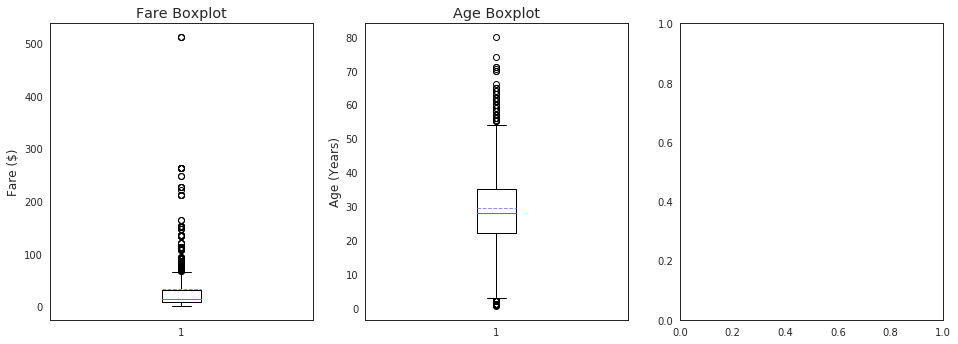

In [22]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

In [ ]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])